In [1]:
import py3Dmol

view = py3Dmol.view(query='pdb:6W9C') # A trimer of the SARS CoV1 PLpro 
view.setStyle({'chain':'A'},{'cartoon':{'color':'spectrum'}}) # highlight cahin A with cartoon representation
view.addSurface(py3Dmol.VDW,{'opacity':0.7,'color':'white'}, {'chain':'A'}) # Add a vanderwaals surface
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [2]:
import pandas as pd 

data = pd.read_csv('coronavirus_data/data/PLpro.csv')
print(len(data))
data.head()

233891


,smiles,activity
0,C[C@@H]1CN(C(=O)C2=C(C=CC(=C2)NC(=O)NC3=CC=CC4...,1
1,C/C(=N\NC(=S)N)/CC(C1=CC=CC=C1)C2=C(C3=CC=CC=C...,1
2,C1CCC2=C3C(=NN(C3=O)C4=CC=CC=C4)N=C(N2CC1)SCC(...,1
3,CCCCCC(=O)N/N=C(\C)/C1=CC=C(C=C1)N2CCCCC2,1
4,CC(=O)NC(C1=C(C2=C(C=CC=N2)C=C1)O)C3=CC=CO3,1


In [3]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
import time


start_timer = time.time()
data['scaffolds'] = data['smiles'].apply(MurckoScaffold.MurckoScaffoldSmilesFromSmiles)
stop_timer = time.time()

print(f'{round(stop_timer - start_timer)} s to apply function to {len(data)} cells    \n\n') #\n means new line

data.head()

RDKit WARNING: [11:20:36] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:20:40] WARNING: not removing hydrogen atom without neighbors


97 s to apply function to 233891 cells    




,smiles,activity,scaffolds
0,C[C@@H]1CN(C(=O)C2=C(C=CC(=C2)NC(=O)NC3=CC=CC4...,1,O=C(Nc1ccc2c(c1)C(=O)NCCC(CNS(=O)(=O)c1ccccc1)...
1,C/C(=N\NC(=S)N)/CC(C1=CC=CC=C1)C2=C(C3=CC=CC=C...,1,O=c1oc2ccccc2cc1Cc1ccccc1
2,C1CCC2=C3C(=NN(C3=O)C4=CC=CC=C4)N=C(N2CC1)SCC(...,1,O=C(CSc1nc2nn(-c3ccccc3)c(=O)c-2c2n1CCCCC2)c1c...
3,CCCCCC(=O)N/N=C(\C)/C1=CC=C(C=C1)N2CCCCC2,1,c1ccc(N2CCCCC2)cc1
4,CC(=O)NC(C1=C(C2=C(C=CC=N2)C=C1)O)C3=CC=CO3,1,c1coc(Cc2ccc3cccnc3c2)c1


,Structure,Scaffold Structure,activity
0,,,1
1,,,1
2,,,1
3,,,1
4,,,1
5,,,1
6,,,1
7,,,1
8,,,1
9,,,1

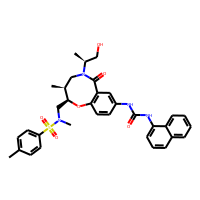
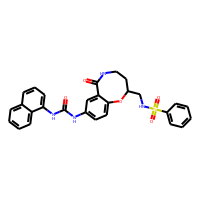
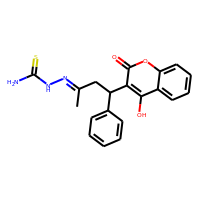
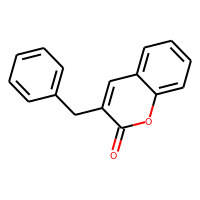
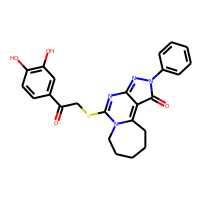
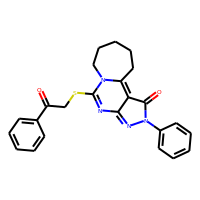
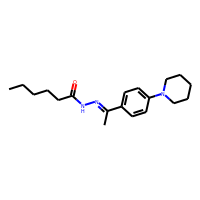
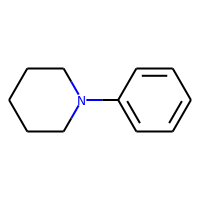
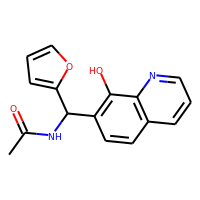
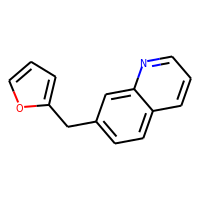
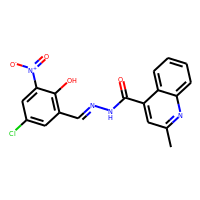
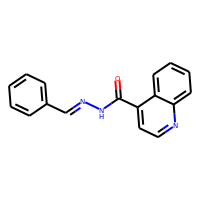
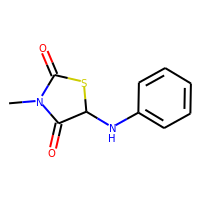
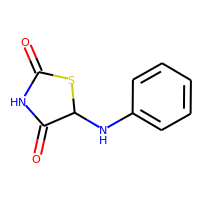
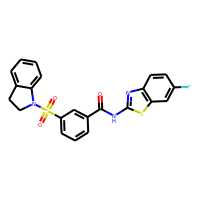
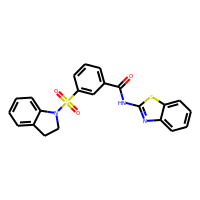
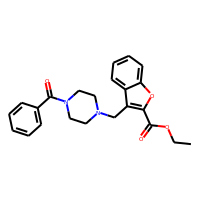
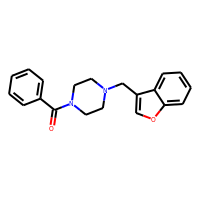
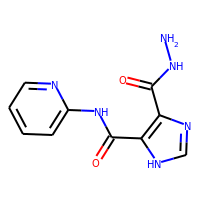
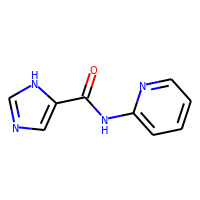
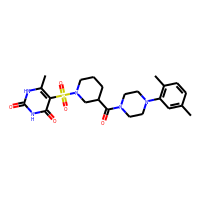
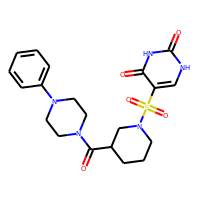

In [4]:
from rdkit.Chem import PandasTools

df = data.loc[:100,:].copy()
PandasTools.AddMoleculeColumnToFrame(frame = df,smilesCol='smiles',molCol='Structure')
PandasTools.AddMoleculeColumnToFrame(frame = df,smilesCol='scaffolds',molCol='Scaffold Structure')
df.loc[0:10,['Structure','Scaffold Structure','activity']]

RDKit ERROR: [11:21:45] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 


,scaffold smiles,count,Structure
0,c1ccccc1,6809,
1,O=C(Nc1ccccc1)c1ccccc1,1000,
2,O=S(=O)(Nc1ccccc1)c1ccccc1,730,
3,c1ccncc1,647,
4,c1ccc2[nH]ccc2c1,531,
5,c1ccc2[nH]cnc2c1,440,
6,,431,
7,c1ccc2ncccc2c1,424,
8,c1ccsc1,378,
9,O=C(COc1ccccc1)Nc1ccccc1,330,

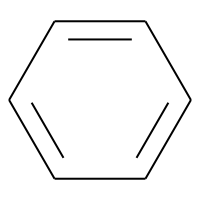
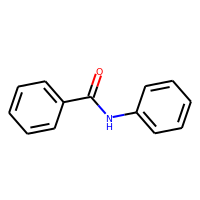
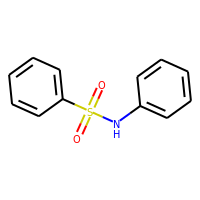
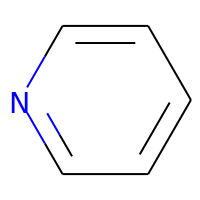
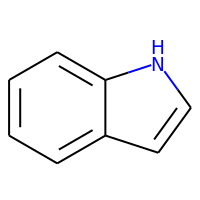
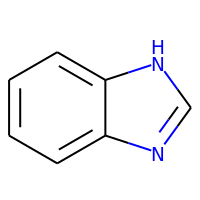
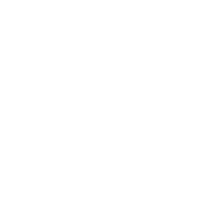
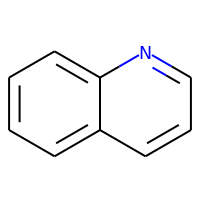
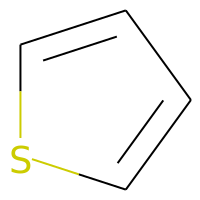
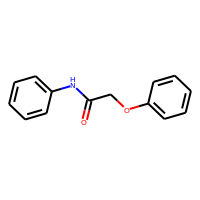
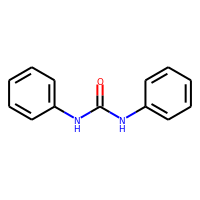

In [5]:
scaffold_counts = data['scaffolds'].value_counts()


topScaffolds = scaffold_counts.reset_index() 
topScaffolds.columns = ['scaffold smiles', 'count']
PandasTools.AddMoleculeColumnToFrame(frame = topScaffolds,smilesCol='scaffold smiles',molCol='Structure')
topScaffolds.loc[0:10,:]

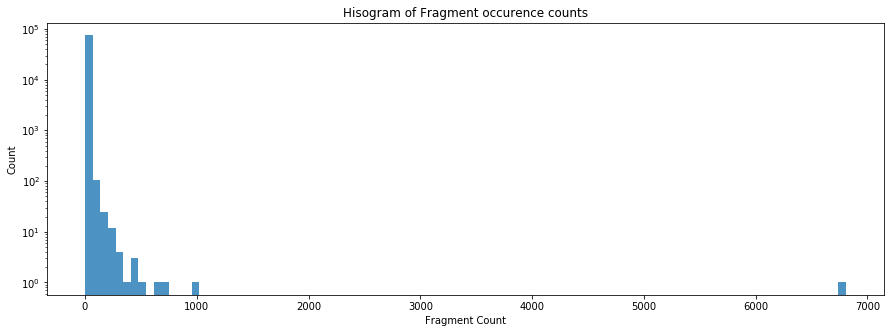

In [6]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (15,5))
plt.hist(topScaffolds['count'], bins=100, alpha = 0.8)
plt.title('Hisogram of Fragment occurence counts')
plt.xlabel('Fragment Count')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [7]:
scaffolds_to_use = topScaffolds.loc[topScaffolds['count'] >1]['scaffold smiles']
compounds_of_interest = data.loc[data['scaffolds'].isin(scaffolds_to_use),:]
print(f'Number of compounds in set = {len(compounds_of_interest)} \n\n')
compounds_of_interest.head()

Number of compounds in set = 192605 




,smiles,activity,scaffolds
1,C/C(=N\NC(=S)N)/CC(C1=CC=CC=C1)C2=C(C3=CC=CC=C...,1,O=c1oc2ccccc2cc1Cc1ccccc1
3,CCCCCC(=O)N/N=C(\C)/C1=CC=C(C=C1)N2CCCCC2,1,c1ccc(N2CCCCC2)cc1
4,CC(=O)NC(C1=C(C2=C(C=CC=N2)C=C1)O)C3=CC=CO3,1,c1coc(Cc2ccc3cccnc3c2)c1
5,CC1=NC2=CC=CC=C2C(=C1)C(=O)N/N=C/C3=C(C(=CC(=C...,1,O=C(NN=Cc1ccccc1)c1ccnc2ccccc12
6,CN1C(=O)C(SC1=O)NC2=CC=CC=C2,1,O=C1NC(=O)C(Nc2ccccc2)S1


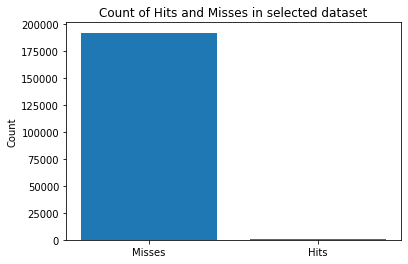

In [8]:
plt.bar(x = ['Misses','Hits'],
        height = compounds_of_interest['activity'].value_counts())
plt.title('Count of Hits and Misses in selected dataset')
plt.ylabel('Count')
plt.show()

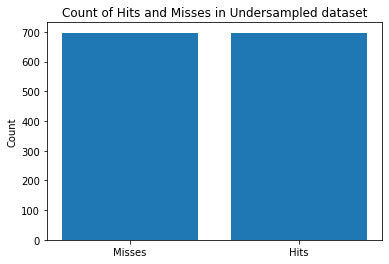

In [9]:
def UnderSample(data):
    hits = data.loc[data['activity'] == 1]
    undersampled_mised = data.loc[data['activity'] ==0].sample(len(hits))

    UndersampledDf = hits.append(undersampled_mised)
    return UndersampledDf
    

data_for_model = UnderSample(data)


plt.bar(x = ['Misses','Hits'],
        height = data_for_model['activity'].value_counts())
plt.title('Count of Hits and Misses in Undersampled dataset')
plt.ylabel('Count')
plt.show()

In [10]:
from rdkit.Chem import Fragments
from rdkit.Chem import AllChem, Crippen

hand_crafted_features = ['NC(=S)N', 'NC(=O)','[N+](=O)[O-]']

def SubstructureMatch(smiles, list_of_substructures):
    mol = Chem.MolFromSmiles(smiles)
    features = [Chem.MolFromSmiles(i) for i in list_of_substructures]
    matches = [int(mol.HasSubstructMatch(i)) for i in features]
    dictionary = dict(zip(list_of_substructures, matches))
    return dictionary


def RDKitBagOfFeatures(smiles):
    mol = Chem.MolFromSmiles(smiles)
    frag_fns = dict(Fragments.fns) 
    frag_matches = dict(zip(frag_fns.keys(), 
                     [i(mol) for i in frag_fns.values()]))

    return frag_matches


def PhysChemFeatures(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    dictionary = {'MolWT':AllChem.CalcExactMolWt(mol),
                  'LogP':Chem.Crippen.MolLogP(mol),
                  'HBondDonors': AllChem.CalcNumLipinskiHBD(mol),
                  'HBondAcceptors': AllChem.CalcNumLipinskiHBA(mol),
                  'NumAromaticRings': AllChem.CalcNumAromaticRings(mol),
                  'NumAromaticHeterocycles': AllChem.CalcNumAromaticHeterocycles(mol),
                  'NumHeteroCycles':AllChem.CalcNumHeterocycles(mol)}
    return dictionary

SubstructureMatch('C1=CC=C(C=C1)/C=N/NC(=S)N', hand_crafted_features) # example/test

{'NC(=S)N': 1, 'NC(=O)': 0, '[N+](=O)[O-]': 0}

In [18]:
rdkit_Fragments = pd.DataFrame(data_for_model['smiles'].apply(RDKitBagOfFeatures).to_list())
our_Fragments = pd.DataFrame(data_for_model['smiles'].apply(SubstructureMatch, args = [hand_crafted_features]).to_list())
pyhyschem_descriptors = pd.DataFrame(data_for_model['smiles'].apply(PhysChemFeatures).to_list())


features = pd.concat(objs = [rdkit_Fragments, our_Fragments, pyhyschem_descriptors], 
                         axis = 1,
                         join = 'inner') 
target = data_for_model['activity']

features.head()

,fr_C_O,fr_C_O_noCOO,fr_Al_OH,fr_Ar_OH,fr_methoxy,fr_oxime,fr_ester,fr_Al_COO,fr_Ar_COO,fr_COO,...,NC(=S)N,NC(=O),[N+](=O)[O-],MolWT,LogP,HBondDonors,HBondAcceptors,NumAromaticRings,NumAromaticHeterocycles,NumHeteroCycles
0,2,2,1,0,0,0,0,0,0,0,...,0,1,0,630.251206,5.33302,3,10,4,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,381.114712,3.22970,4,6,3,1,1
2,1,1,0,2,0,0,0,0,0,0,...,0,0,0,462.136176,3.64640,2,8,2,0,3
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,315.231063,4.09740,1,4,1,0,1
4,1,1,0,1,0,0,0,0,0,0,...,0,1,0,282.100442,2.75890,2,5,3,2,2


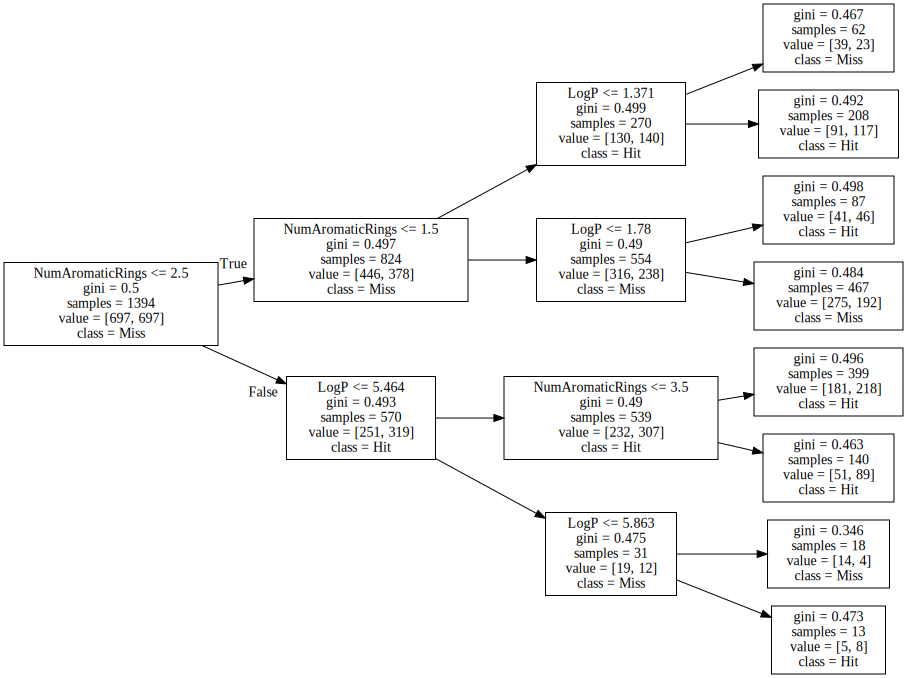

In [43]:
from sklearn import tree
import graphviz

classifier = tree.DecisionTreeClassifier(max_depth=3)

classifier.fit(pyhyschem_descriptors.loc[:,['LogP','NumAromaticRings']],
              data_for_model['activity'])


tree_data = tree.export_graphviz(classifier,
                                 out_file = None,
                                 feature_names = ['LogP','NumAromaticRings'],
                                class_names=['Miss','Hit'],
                                rotate=True)
graph = graphviz.Source(tree_data)
graph

In [48]:
from sklearn.model_selection import train_test_split
target = data_for_model['activity']

[i.shape for i in train_test_split(features, target, test_size = 0.2)]

[(1115, 95), (279, 95), (1115,), (279,)]

In [49]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)
x_train

,fr_C_O,fr_C_O_noCOO,fr_Al_OH,fr_Ar_OH,fr_methoxy,fr_oxime,fr_ester,fr_Al_COO,fr_Ar_COO,fr_COO,...,NC(=S)N,NC(=O),[N+](=O)[O-],MolWT,LogP,HBondDonors,HBondAcceptors,NumAromaticRings,NumAromaticHeterocycles,NumHeteroCycles
345,1,1,0,0,0,0,0,0,0,0,...,0,1,0,236.061949,1.37690,0,4,0,0,2
1144,1,1,0,0,0,0,0,0,0,0,...,0,1,0,347.120068,4.17640,1,4,2,0,1
1149,1,1,0,0,0,0,0,0,0,0,...,0,1,0,271.103085,4.18762,1,2,2,1,1
329,0,0,0,0,0,0,0,0,0,0,...,1,0,0,311.145619,3.76554,2,3,2,0,1
290,1,1,0,0,0,0,0,0,0,0,...,0,1,0,167.105862,1.37504,2,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,0,0,0,0,3,0,0,0,0,0,...,0,0,0,374.159020,1.54224,4,9,3,2,2
483,0,0,0,0,0,0,0,0,0,0,...,1,0,0,278.156518,1.75224,2,4,1,0,1
1302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,314.104672,2.74490,1,6,3,2,2
742,3,2,0,0,0,0,0,1,0,1,...,0,1,0,532.112664,3.84700,1,7,3,1,3


In [51]:
classifier = tree.DecisionTreeClassifier()

classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
predictions = classifier.predict(x_test)
tmp = pd.DataFrame([predictions, y_test], index = ['Predictions','Actual']).transpose()
sum(tmp['Predictions'] == tmp['Actual'])/len(tmp)

0.6487455197132617

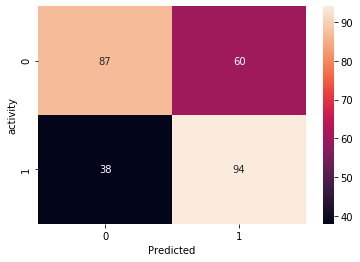

In [67]:
import seaborn as sns

confusion = pd.crosstab(y_test, predictions)
sns.heatmap(confusion,  annot=True)
plt.xlabel('Predicted')
plt.show()

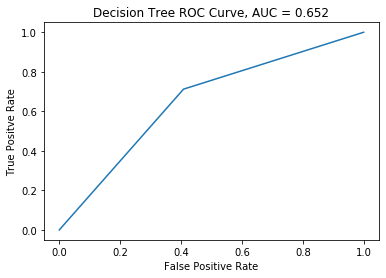

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score


roc_auc = roc_auc_score(y_test, predictions)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)

plt.title(f'Decision Tree ROC Curve, AUC = {round(roc_auc,3)}')
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.show()

In [75]:
broad = pd.read_csv('coronavirus_data/data/broad_repurposing_library.csv')
broad

,smiles
0,CO\N=C(\C(=O)NC1C2SCC(CSc3nnnn3C)=C(N2C1=O)C(O...
1,CN1CCN(CC1)c1c(F)cc2c3c1SCCn3cc(C(O)=O)c2=O
2,C[C@H]1CN(C[C@@H](C)N1)c1c(F)c(N)c2c(c1F)n(cc(...
3,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@H]2[C@H]3SCC(CSc...
4,CCn1cc(C(O)=O)c(=O)c2cc(F)c(nc12)N1CCNCC1
...,...
6106,C(Oc1ccccc1C1CC1)C1=NCCN1
6107,CCOc1ccc(NC(C)=Nc2ccc(OCC)cc2)cc1
6108,CC[C@@H]1CN2C(=N1)c1[nH]c(nc1N(C)C2=O)-c1ccccc1
6109,N=C(NNc1ccccc1)c1ccccc1


In [76]:
broad_rdkit_Fragments = pd.DataFrame(broad['smiles'].apply(RDKitBagOfFeatures).to_list())
broad_our_Fragments = pd.DataFrame(broad['smiles'].apply(SubstructureMatch, args = [hand_crafted_features]).to_list())
broad_pyhyschem_descriptors = pd.DataFrame(broad['smiles'].apply(PhysChemFeatures).to_list())


broad_features = pd.concat(objs = [broad_rdkit_Fragments, 
                                   broad_our_Fragments, 
                                   broad_pyhyschem_descriptors], 
                         axis = 1,
                         join = 'inner') 

broad_features.head()

,fr_C_O,fr_C_O_noCOO,fr_Al_OH,fr_Ar_OH,fr_methoxy,fr_oxime,fr_ester,fr_Al_COO,fr_Ar_COO,fr_COO,...,NC(=S)N,NC(=O),[N+](=O)[O-],MolWT,LogP,HBondDonors,HBondAcceptors,NumAromaticRings,NumAromaticHeterocycles,NumHeteroCycles
0,3,2,0,0,0,1,0,1,0,1,...,0,1,0,511.051478,-0.8698,4,14,2,2,4
1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,363.105291,1.6963,1,6,2,1,3
2,1,0,0,0,0,0,0,0,1,1,...,0,0,0,392.165997,2.0816,4,7,2,1,2
3,6,5,0,1,0,0,0,1,0,1,...,0,1,0,645.142401,-1.1120,4,17,2,1,4
4,1,0,0,0,0,0,0,0,1,1,...,0,0,0,320.128469,0.6633,2,7,2,2,3


In [81]:
predicted_hit = classifier.predict(broad_features)
predicted_hit = pd.Series(predicted_hit)

broad['Predicted Hit'] = predicted_hit
broad.head()

,smiles,Predicted Hit
0,CO\N=C(\C(=O)NC1C2SCC(CSc3nnnn3C)=C(N2C1=O)C(O...,1
1,CN1CCN(CC1)c1c(F)cc2c3c1SCCn3cc(C(O)=O)c2=O,0
2,C[C@H]1CN(C[C@@H](C)N1)c1c(F)c(N)c2c(c1F)n(cc(...,0
3,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@H]2[C@H]3SCC(CSc...,1
4,CCn1cc(C(O)=O)c(=O)c2cc(F)c(nc12)N1CCNCC1,0


In [83]:
broad.sort_values('Predicted Hit', ascending = False)

,smiles,Predicted Hit
0,CO\N=C(\C(=O)NC1C2SCC(CSc3nnnn3C)=C(N2C1=O)C(O...,1
2889,CN(C)C(=S)SSC(=S)N(C)C,1
2857,OC[C@H]1O[C@H]([C@H](O)[C@@H](O)[C@@H]1O)c1c(O...,1
2859,CN(C)CCCNC(=O)c1ccc(cc1)-c1cc(O)c2ncccc2c1,1
2862,CN1CC(=O)N2[C@H](Cc3c([nH]c4ccccc34)[C@H]2c2cc...,1
...,...,...
3179,COc1cc(\C=C(/C#N)C(N)=O)cc(CSc2nc3ccccc3s2)c1O,0
3180,Cc1cc(C)c(C2=NOC3C4CCC(C4)C23)c(C)c1,0
3181,COP(=O)(OC)C(O)C(Cl)(Cl)Cl,0
3182,Fc1ccc(Cn2c(NC3CCNCC3)nc3ccccc23)cc1,0


,smiles,Predicted Hit,Structure
0,CO\N=C(\C(=O)NC1C2SCC(CSc3nnnn3C)=C(N2C1=O)C(O...,1,
1,CN1CCN(CC1)c1c(F)cc2c3c1SCCn3cc(C(O)=O)c2=O,0,
2,C[C@H]1CN(C[C@@H](C)N1)c1c(F)c(N)c2c(c1F)n(cc(...,0,
3,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@H]2[C@H]3SCC(CSc...,1,
4,CCn1cc(C(O)=O)c(=O)c2cc(F)c(nc12)N1CCNCC1,0,
...,...,...,...
6106,C(Oc1ccccc1C1CC1)C1=NCCN1,0,
6107,CCOc1ccc(NC(C)=Nc2ccc(OCC)cc2)cc1,0,
6108,CC[C@@H]1CN2C(=N1)c1[nH]c(nc1N(C)C2=O)-c1ccccc1,1,
6109,N=C(NNc1ccccc1)c1ccccc1,0,

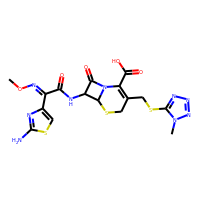
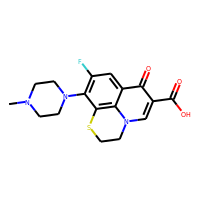
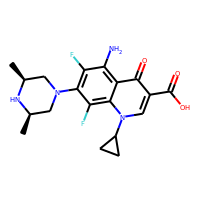
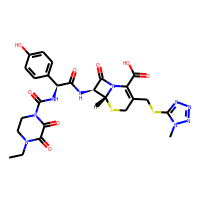
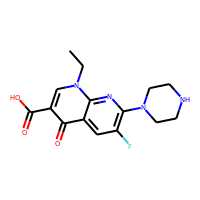
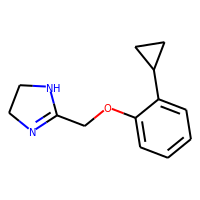
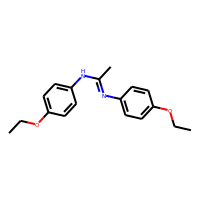
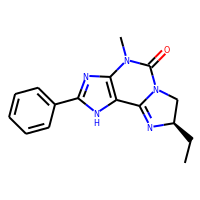
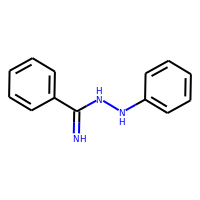
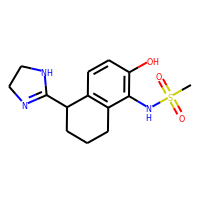

In [84]:
PandasTools.AddMoleculeColumnToFrame(broad, smilesCol='smiles',molCol='Structure')
broad

,smiles,Predicted Hit,Structure
0,CO\N=C(\C(=O)NC1C2SCC(CSc3nnnn3C)=C(N2C1=O)C(O...,1,
2889,CN(C)C(=S)SSC(=S)N(C)C,1,
2857,OC[C@H]1O[C@H]([C@H](O)[C@@H](O)[C@@H]1O)c1c(O...,1,
2859,CN(C)CCCNC(=O)c1ccc(cc1)-c1cc(O)c2ncccc2c1,1,
2862,CN1CC(=O)N2[C@H](Cc3c([nH]c4ccccc34)[C@H]2c2cc...,1,
...,...,...,...
3179,COc1cc(\C=C(/C#N)C(N)=O)cc(CSc2nc3ccccc3s2)c1O,0,
3180,Cc1cc(C)c(C2=NOC3C4CCC(C4)C23)c(C)c1,0,
3181,COP(=O)(OC)C(O)C(Cl)(Cl)Cl,0,
3182,Fc1ccc(Cn2c(NC3CCNCC3)nc3ccccc23)cc1,0,

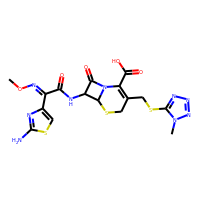
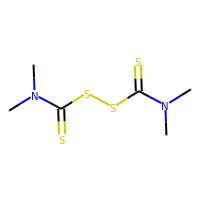
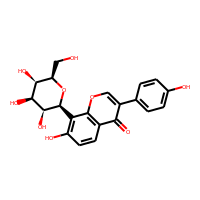
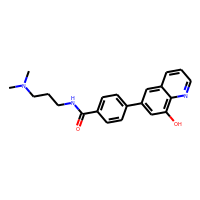
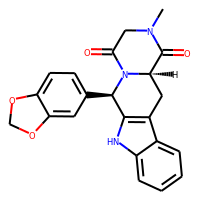
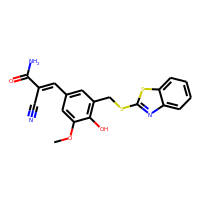
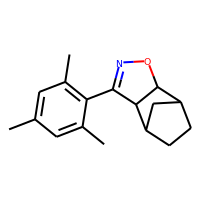
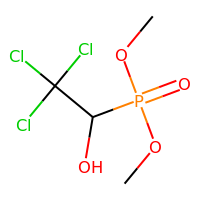
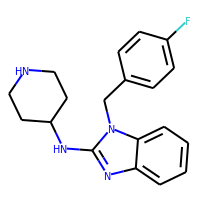
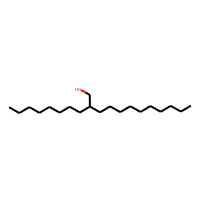

In [86]:
broad.sort_values('Predicted Hit', ascending=False)